## FinViz:

In [10]:
# Import libraries
from urllib.request import urlopen, Request
from datetime import datetime
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

finwiz_url = 'https://finviz.com/quote.ashx?t='

In [11]:
def get_news(ticker_code):

    # 1. Define URL:
    finwiz_url = 'https://finviz.com/quote.ashx?t='

    # 2. Requesting data:
    news_tables = {}
    tickers = [ticker_code]

    for ticker in tickers:
        url = finwiz_url + ticker
        req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
        response = urlopen(req)    
        # Read the contents of the file into 'html'
        html = BeautifulSoup(response)
        # Find 'news-table' in the Soup and load it into 'news_table'
        news_table = html.find(id='news-table')
        # Add the table to our dictionary
        news_tables[ticker] = news_table

    #3. Parsing news:
    parsed_news = []
    # Iterate through the news
    for file_name, news_table in news_tables.items():
        # Iterate through all tr tags in 'news_table'
        for x in news_table.findAll('tr'):
            # read the text from each tr tag into text
            # get text from a only
            text = x.a.get_text() 
            # splite text in the td tag into a list 
            date_scrape = x.td.text.split()
            # if the length of 'date_scrape' is 1, load 'time' as the only element

            if len(date_scrape) == 1:
                time = date_scrape[0]
                
            # else load 'date' as the 1st element and 'time' as the second    
            else:
                date = date_scrape[0]
                time = date_scrape[1]
            # Extract the ticker from the file name, get the string up to the 1st '_'  
            ticker = file_name.split('_')[0]
            
            # Append ticker, date, time and headline as a list to the 'parsed_news' list
            parsed_news.append([ticker, date, time, text])

    # 4. Split into columns and save:
    # Instantiate the sentiment intensity analyzer
    vader = SentimentIntensityAnalyzer()

    # Set column names
    columns = ['ticker', 'date', 'time', 'headline']

    # Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
    parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

    # Iterate through the headlines and get the polarity scores using vader
    scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

    # Convert the 'scores' list of dicts into a DataFrame
    scores_df = pd.DataFrame(scores)

    # Join the DataFrames of the news and the list of dicts
    parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

    # Convert the date column from string to datetime
    parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

    parsed_and_scored_news.to_csv('~/LighthouseLabs-Final/FinViz_Headline_Data/' + ticker + '_data_' + (datetime.today().strftime('%Y-%m-%d-%H-%M')) + '.csv')

In [25]:
get_news('AAPL')
get_news('TSLA')
get_news('AMZN')
get_news('VLO')
get_news('GS')
get_news('CFG')
get_news('NVDA')
get_news('AMD')
get_news('FB')
get_news('MSFT')
get_news('COP')
get_news('F')
get_news('JPM')
get_news('RACE')
get_news('NVDA')
get_news('JNJ')
get_news('PG')
get_news('NFLX')
get_news('CVX')
get_news('IBM')
get_news('PFE')
get_news('NKE')

print("Done!")

Done!


In [10]:
news_tables = {}
tickers = ['AMZN', 'TSLA', 'AAPL']

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

# Read one single day of headlines for 'AMZN' 
amzn = news_tables['AMZN']
# Get all the table rows tagged in HTML with <tr> into 'amzn_tr'
amzn_tr = amzn.findAll('tr')

for i, table_row in enumerate(amzn_tr):
    # Read the text of the element 'a' into 'link_text'
    a_text = table_row.a.text
    # Read the text of the element 'td' into 'data_text'
    td_text = table_row.td.text
    # Print the contents of 'link_text' and 'data_text' 
    print(a_text)
    print(td_text)
    # Exit after printing 4 rows of data
    if i == 3:
        break

In [4]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])

In [11]:
from datetime import datetime

# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.to_csv('~/LighthouseLabs-Final/FinViz_Headline_Data/' + 'news_data_' + (datetime.today().strftime('%Y-%m-%d-%H-%M')) + '.csv')

parsed_and_scored_news.head()

,ticker,date,time,headline,neg,neu,pos,compound
0,AMZN,2020-09-24,12:23PM,Alphabet Stock Should Be a Major Winner for th...,0.0,0.556,0.444,0.7506
1,AMZN,2020-09-24,11:44AM,US STOCKS-Nasdaq rises on tech boost as econom...,0.0,0.769,0.231,0.4019
2,AMZN,2020-09-24,11:39AM,What a Biden presidency would mean for tech st...,0.0,1.000,0.000,0.0000
3,AMZN,2020-09-24,11:17AM,Is Plug Power Stock a Buy?,0.0,1.000,0.000,0.0000
4,AMZN,2020-09-24,10:57AM,"Spotify, Hollywood producer Chernin to adapt p...",0.0,1.000,0.000,0.0000


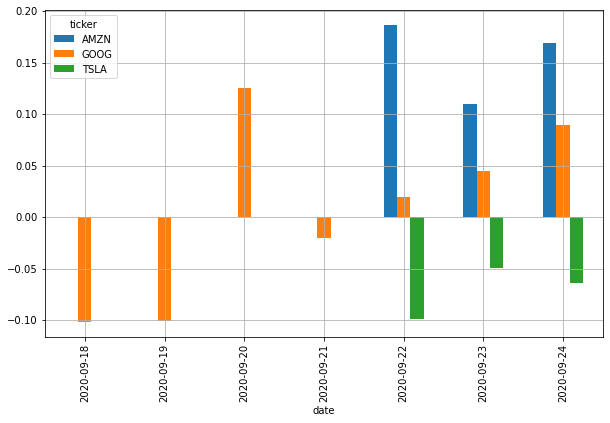

In [6]:
plt.rcParams['figure.figsize'] = [10, 6]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()

amzn_data['Volume'].plot(label='AMZN', title='Volume Traded')

In [8]:
f_name = 'news_data' + datetime.today().strftime('%Y-%m-%d-%H-%M') + '.csv'
f_name

'news_data2020-09-24-12-54.csv'